In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import time
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

def relu(z):
    return np.maximum(z, 0)

def cross_entropy(predictions, targets, epsilon=1e-20):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    crossEntropy = -np.sum(targets*np.log(predictions))
    return crossEntropy

In [3]:
epochs = 3
batch_size = 16
hidden = 128
nn_input = 784
output = 10
lr = 0.01
total_batch = int(mnist.train.num_examples/batch_size)
iterations = epochs * total_batch

In [4]:
def scratchNN(batch_size, iterations):
    a = 0
    w1 = np.random.normal(0, 0.1 ,(hidden, nn_input))
    b1 = np.random.normal(0, 0.1 ,(hidden))
    w2 = np.random.normal(0, 0.1 ,(output, hidden))
    b2 = np.random.normal(0, 0.1 ,(output))
    
    w2_track = np.zeros(iterations)
    b2_track = np.zeros(iterations)
    w1_track = np.zeros(iterations)
    b1_track = np.zeros(iterations)
    loss_track = np.zeros(iterations)
    loss_plot = np.zeros(round(iterations/total_batch)+1)
    acc_track = np.zeros(iterations)
    ts = time.time()
    for i in range(iterations):    
        #st = time.time()
        cost = 0 
        bw2 = 0
        bb2 = 0
        bw1 = 0 
        bb1 = 0 
        acc = 0 
    # for each sample 
        x_batch, y_batch = mnist.train.next_batch(batch_size)

        for n in range(batch_size):
            x = x_batch[n]
            y = y_batch[n]

            l1 = np.dot(w1,x) + b1
            a1 = relu(l1)
            l2 = np.matmul(w2, a1) + b2
           #print(l2.shape)
            a2 = softmax(l2)
            
            #print(a2.shape)
            #print(y.shape)
            loss = cross_entropy(a2, y)

            acc += 1.0*( np.argmax(a2) == np.argmax(y) )

            # backward propagation 
            bw2 += (a2 - y).reshape(output,1).dot( a1.reshape(1, hidden))
            bb2 += (a2 - y)

            bb1 +=  (a2 - y).dot(w2).dot(np.diag(np.sign(a1)))
            bw1 += bb1.reshape(hidden,1).dot(x.reshape(1, nn_input))
            
        bw2 = bw2/batch_size 
        bb2 = bb2/batch_size 
        bb1 = bb1/batch_size 
        bw1 = bw1/batch_size 
        loss = loss/batch_size
        acc  = acc/batch_size

        w1_track[i] =  np.abs(bw1).sum()  
        b1_track[i] =  np.abs(bb1).sum()  
        w2_track[i] =  np.abs(bw2).sum()  
        b2_track[i] =  np.abs(bb2).sum()  
        loss_track[i] = loss
        acc_track[i] = acc

       # update parameter     
        w2 -= lr*bw2
        b2 -= lr*bb2
        w1 -= lr*bw1
        b1 -= lr*bb1
    
        if i%total_batch == 0:
            loss_plot[a] = loss
            print("Epoch " + str(a) + ", Validation Accuracy:{:.4f}".format(acc)+ ", Loss: {:.4f}\t".format(loss))
            a = a + 1
    te = time.time()
    print('Time Cost:{:.3f}s'.format(te-ts))
     
    plt.plot(loss_plot)
    plt.title('loss batch size:'+ str(batch_size) )
    x_test = mnist.test.images
    y_test = mnist.test.labels
    num_test = mnist.test.num_examples #10,000
    loss = 0
    acc = 0 

    for n in range(10000):
        x = x_test[n]
        y = y_test[n]
        # feed forward 
        l1 = np.dot(w1,x) + b1
        a1 = relu(l1)
        l2 = np.matmul(w2, a1) + b2
        a2 = softmax(l2)
        loss = cross_entropy(a2, y)
        acc += 1.0*(np.argmax(a2) == np.argmax(y))

    loss = loss/10000
    acc  = acc/10000
    print("Test Accuracy:{:.4f}".format(acc)+ ", Cost: {:.4f}\t".format(loss))

<h>Batch Size: 16</h>

Epoch 0, Validation Accuracy:0.1250, Loss: 0.1447	
Epoch 1, Validation Accuracy:0.9375, Loss: 0.0146	
Epoch 2, Validation Accuracy:1.0000, Loss: 0.0010	
Time Cost:29.083s
Test Accuracy:0.9254, Cost: 0.0000	


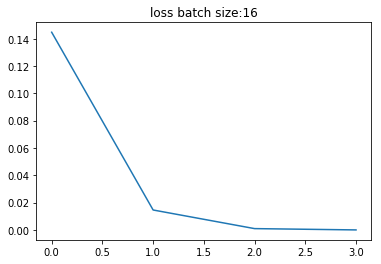

In [5]:
scratchNN(16,iterations)

<h>Batch Size: 64</h>

In [6]:
epochs = 3
batch_size = 64
hidden = 128
nn_input = 784
output = 10
lr = 0.01
total_batch = int(mnist.train.num_examples/batch_size)
iterations = epochs * total_batch

Epoch 0, Validation Accuracy:0.0469, Loss: 0.0359	
Epoch 1, Validation Accuracy:0.8281, Loss: 0.0006	
Epoch 2, Validation Accuracy:0.8438, Loss: 0.0018	
Time Cost:27.669s
Test Accuracy:0.8546, Cost: 0.0000	


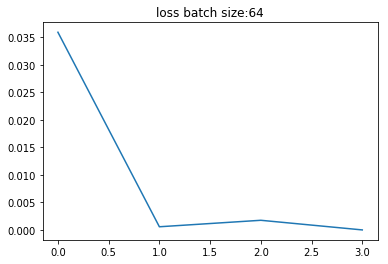

In [7]:
scratchNN(64, iterations)

<h>Batch Size: 256</h>

In [8]:
epochs = 3
batch_size = 256
hidden = 128
nn_input = 784
output = 10
lr = 0.01
total_batch = int(mnist.train.num_examples/batch_size)
iterations = epochs * total_batch

Epoch 0, Validation Accuracy:0.0977, Loss: 0.0132	
Epoch 1, Validation Accuracy:0.5391, Loss: 0.0081	
Epoch 2, Validation Accuracy:0.7070, Loss: 0.0002	
Time Cost:27.145s
Test Accuracy:0.7446, Cost: 0.0000	


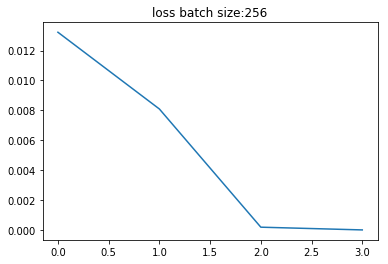

In [9]:
scratchNN(256,iterations)

<h>Batch Size: 1024</h>

In [10]:
epochs = 3
batch_size = 1024
hidden = 128
nn_input = 784
output = 10
lr = 0.01
total_batch = int(mnist.train.num_examples/batch_size)
iterations = epochs * total_batch

Epoch 0, Validation Accuracy:0.0830, Loss: 0.0029	
Epoch 1, Validation Accuracy:0.1523, Loss: 0.0021	
Epoch 2, Validation Accuracy:0.2344, Loss: 0.0022	
Time Cost:26.768s
Test Accuracy:0.1334, Cost: 0.0002	


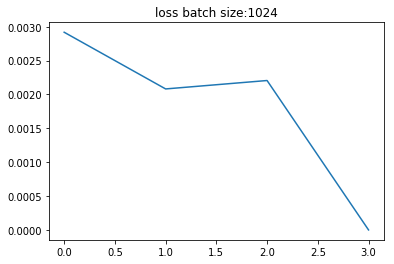

In [11]:
scratchNN(1024,iterations)

<h1>Part G:  Implement NN in Tensorflow</h1>

<h>Batch Size: 16</h>

In [5]:
#learning rate
lr = 0.01
#number of traning epochs
epochs = 3
#number of batch_size
batch_size = 16
total_batch = int(mnist.train.num_examples/batch_size)
num_steps = epochs * total_batch

#network parameters
n_hidden_1 = 128
# n_hidden_2 = 200
num_input = 784
num_classes = 10

tf.reset_default_graph()
#tf graph input
X = tf.placeholder(tf.float32,[None,num_input],name='X')
Y = tf.placeholder(tf.int32,[None,num_classes],name='Y')

#Layers weight & bias
weights = {
    'W1': tf.Variable(tf.random_normal([num_input, n_hidden_1],stddev=0.1),name='W1'),
    'Wout': tf.Variable(tf.random_normal([n_hidden_1, num_classes],stddev=0.1),name='Wout')
}

biases = {
    'b1': tf.Variable(tf.zeros(shape=[n_hidden_1]),name='b1'),
    'bout': tf.Variable(tf.zeros(shape=[num_classes]),name='bout')
}

#define a neural net model
def neural_net(x):
    layer_1_out = tf.nn.relu(tf.add(tf.matmul(x,weights['W1']),biases['b1']))
    out = tf.add(tf.matmul(layer_1_out,weights['Wout']),biases['bout'])
    return out

#predicted labels
logits = neural_net(X)
Y_hat = tf.nn.softmax(logits)

#define cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y),name='cost')
#define optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op = optimizer.minimize(cost)

#compare the predicted labels with true labels
correct_pred = tf.equal(tf.argmax(Y_hat,1),tf.argmax(Y,1))

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

#Initialize the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    ts = time.time()
    for i in range(num_steps):
        # fetch batch
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # run optimization
        _, loss = sess.run([train_op, cost], feed_dict={X: batch_x, Y: batch_y})
        if i % total_batch == 0:
            
            acc = sess.run(accuracy, feed_dict={X: batch_x, Y: batch_y})
            print("Epoch " + str(i/total_batch+1) +"\tCost: {:.3f}\t".format(loss)+", Accuracy= {:.3f}".format(acc))
    te = time.time()
    print('Time Cost:{:.3f}s'.format(te-ts))
    print("Testing ACcuracy:", sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Epoch 1.0	Cost: 2.390	, Accuracy= 0.062
Epoch 2.0	Cost: 0.376	, Accuracy= 0.938
Epoch 3.0	Cost: 0.024	, Accuracy= 1.000
Time Cost:9.566s
Testing ACcuracy: 0.9381


<h>Batch Size: 64</h>

In [3]:
#learning rate
lr = 0.01
#number of traning epochs
epochs = 3
#number of batch_size
batch_size = 64
total_batch = int(mnist.train.num_examples/batch_size)
num_steps = epochs * total_batch

#network parameters
n_hidden_1 = 128
num_input = 784
num_classes = 10

tf.reset_default_graph()
#tf graph input
X = tf.placeholder(tf.float32,[None,num_input],name='X')
Y = tf.placeholder(tf.int32,[None,num_classes],name='Y')

#Layers weight & bias
weights = {
    'W1': tf.Variable(tf.random_normal([num_input, n_hidden_1],stddev=0.1),name='W1'),
    'Wout': tf.Variable(tf.random_normal([n_hidden_1, num_classes],stddev=0.1),name='Wout')
}

biases = {
    'b1': tf.Variable(tf.zeros(shape=[n_hidden_1]),name='b1'),
    'bout': tf.Variable(tf.zeros(shape=[num_classes]),name='bout')
}

#define a neural net model
def neural_net(x):
    layer_1_out = tf.nn.relu(tf.add(tf.matmul(x,weights['W1']),biases['b1']))
    out = tf.add(tf.matmul(layer_1_out,weights['Wout']),biases['bout'])
    return out

#predicted labels
logits = neural_net(X)
Y_hat = tf.nn.softmax(logits)

#define cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y),name='cost')
#define optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op = optimizer.minimize(cost)

#compare the predicted labels with true labels
correct_pred = tf.equal(tf.argmax(Y_hat,1),tf.argmax(Y,1))

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

#Initialize the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    ts = time.time()
    for i in range(num_steps):
        # fetch batch
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # run optimization
        _, loss = sess.run([train_op, cost], feed_dict={X: batch_x, Y: batch_y})
        if i % total_batch == 0:
            
            acc = sess.run(accuracy, feed_dict={X: batch_x, Y: batch_y})
            print("Epoch " + str(i/total_batch+1) +"\tCost: {:.3f}\t".format(loss)+", Accuracy= {:.3f}".format(acc))
    te = time.time()
    print('Time Cost:{:.3f}s'.format(te-ts))
    print("Testing ACcuracy:", sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Epoch 1.0	Cost: 2.399	, Accuracy= 0.109
Epoch 2.0	Cost: 0.521	, Accuracy= 0.859
Epoch 3.0	Cost: 0.515	, Accuracy= 0.891
Time Cost:3.008s
Testing ACcuracy: 0.9069


<h>Batch Size: 256</h>

In [4]:
#learning rate
lr = 0.01
#number of traning epochs
epochs = 3
#number of batch_size
batch_size = 256
total_batch = int(mnist.train.num_examples/batch_size)
num_steps = epochs * total_batch

#network parameters
n_hidden_1 = 128
num_input = 784
num_classes = 10

tf.reset_default_graph()
#tf graph input
X = tf.placeholder(tf.float32,[None,num_input],name='X')
Y = tf.placeholder(tf.int32,[None,num_classes],name='Y')

#Layers weight & bias
weights = {
    'W1': tf.Variable(tf.random_normal([num_input, n_hidden_1],stddev=0.1),name='W1'),
    'Wout': tf.Variable(tf.random_normal([n_hidden_1, num_classes],stddev=0.1),name='Wout')
}

biases = {
    'b1': tf.Variable(tf.zeros(shape=[n_hidden_1]),name='b1'),
    'bout': tf.Variable(tf.zeros(shape=[num_classes]),name='bout')
}

#define a neural net model
def neural_net(x):
    layer_1_out = tf.nn.relu(tf.add(tf.matmul(x,weights['W1']),biases['b1']))
    out = tf.add(tf.matmul(layer_1_out,weights['Wout']),biases['bout'])
    return out

#predicted labels
logits = neural_net(X)
Y_hat = tf.nn.softmax(logits)

#define cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y),name='cost')
#define optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op = optimizer.minimize(cost)

#compare the predicted labels with true labels
correct_pred = tf.equal(tf.argmax(Y_hat,1),tf.argmax(Y,1))

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

#Initialize the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    ts = time.time()
    for i in range(num_steps):
        # fetch batch
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # run optimization
        _, loss = sess.run([train_op, cost], feed_dict={X: batch_x, Y: batch_y})
        if i % total_batch == 0:
            
            acc = sess.run(accuracy, feed_dict={X: batch_x, Y: batch_y})
            print("Epoch " + str(i/total_batch+1) +"\tCost: {:.3f}\t".format(loss)+", Accuracy= {:.3f}".format(acc))
    te = time.time()
    print('Time Cost:{:.3f}s'.format(te-ts))
    print("Testing ACcuracy:", sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Epoch 1.0	Cost: 2.569	, Accuracy= 0.086
Epoch 2.0	Cost: 1.304	, Accuracy= 0.652
Epoch 3.0	Cost: 0.766	, Accuracy= 0.797
Time Cost:1.193s
Testing ACcuracy: 0.8556


<h>Batch Size: 1024</h>

In [6]:
#learning rate
lr = 0.01
#number of traning epochs
epochs = 3
#number of batch_size
batch_size = 1024
total_batch = int(mnist.train.num_examples/batch_size)
num_steps = epochs * total_batch

#network parameters
n_hidden_1 = 128

num_input = 784
num_classes = 10

tf.reset_default_graph()
#tf graph input
X = tf.placeholder(tf.float32,[None,num_input],name='X')
Y = tf.placeholder(tf.int32,[None,num_classes],name='Y')

#Layers weight & bias
weights = {
    'W1': tf.Variable(tf.random_normal([num_input, n_hidden_1],stddev=0.1),name='W1'),
    'Wout': tf.Variable(tf.random_normal([n_hidden_1, num_classes],stddev=0.1),name='Wout')
}

biases = {
    'b1': tf.Variable(tf.zeros(shape=[n_hidden_1]),name='b1'),
    'bout': tf.Variable(tf.zeros(shape=[num_classes]),name='bout')
}

#define a neural net model
def neural_net(x):
    layer_1_out = tf.nn.relu(tf.add(tf.matmul(x,weights['W1']),biases['b1']))
    out = tf.add(tf.matmul(layer_1_out,weights['Wout']),biases['bout'])
    return out

#predicted labels
logits = neural_net(X)
Y_hat = tf.nn.softmax(logits)

#define cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y),name='cost')
#define optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op = optimizer.minimize(cost)

#compare the predicted labels with true labels
correct_pred = tf.equal(tf.argmax(Y_hat,1),tf.argmax(Y,1))

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

#Initialize the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    ts = time.time()
    for i in range(num_steps):
        # fetch batch
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # run optimization
        _, loss = sess.run([train_op, cost], feed_dict={X: batch_x, Y: batch_y})
        if i % total_batch == 0:
            
            acc = sess.run(accuracy, feed_dict={X: batch_x, Y: batch_y})
            print("Epoch " + str(i/total_batch+1) +"\tCost: {:.3f}\t".format(loss)+", Accuracy= {:.3f}".format(acc))
    te = time.time()
    print('Time Cost:{:.3f}s'.format(te-ts))
    print("Testing ACcuracy:", sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Epoch 1.0	Cost: 2.624	, Accuracy= 0.064
Epoch 2.0	Cost: 1.956	, Accuracy= 0.382
Epoch 3.0	Cost: 1.583	, Accuracy= 0.599
Time Cost:0.691s
Testing ACcuracy: 0.6807
